# Data cleaning 

In [90]:
# Import os module 
import os
# Processing data
import pandas as pd
# Linear algebra
import numpy as np
# K-means model
from sklearn.cluster import KMeans
# Scale Feature
from sklearn.preprocessing import MinMaxScaler
# Data visualisation
import matplotlib.pyplot as plt

In [8]:
pwd

'/Users/zhouhao/Documents/Scor/GROUP_20_Repository/03_Code'

In [9]:
os.chdir('/Users/zhouhao/Documents/Scor/GROUP_20_Repository/02_Data/2019_Kharif')

In [10]:
# Read all the files in the folder
file_list = os.listdir()
file_list

['2019_Gujarat_Kharif.xlsx',
 '2019_Chhattisgarh_Kharif.xlsx',
 '2019_Karnataka_Kharif.xlsx',
 '.DS_Store',
 '2019_Andhra Pradesh_Kharif.xlsx',
 '2019_West Bengal_Kharif.xlsx',
 '2019_Uttarakhand_Kharif.xlsx',
 '2019_Rajasthan_Kharif.xlsx',
 '2019_Madhya Pradesh_Kharif.xlsx',
 '2019_Jharkhand_Kharif.xlsx',
 '2019_Maharashtra_Kharif.xlsx',
 '2019_Uttar Pradesh_Kharif.xlsx',
 '2019_Haryana_Kharif.xlsx',
 '~$2019_Andhra Pradesh_Kharif.xlsx',
 '2019_Telangana_Kharif.xlsx',
 '2019_Odisha_Kharif.xlsx']

In [11]:
# Clean file_list
file_list.remove('.DS_Store')
file_list.remove('~$2019_Andhra Pradesh_Kharif.xlsx')
file_list

['2019_Gujarat_Kharif.xlsx',
 '2019_Chhattisgarh_Kharif.xlsx',
 '2019_Karnataka_Kharif.xlsx',
 '2019_Andhra Pradesh_Kharif.xlsx',
 '2019_West Bengal_Kharif.xlsx',
 '2019_Uttarakhand_Kharif.xlsx',
 '2019_Rajasthan_Kharif.xlsx',
 '2019_Madhya Pradesh_Kharif.xlsx',
 '2019_Jharkhand_Kharif.xlsx',
 '2019_Maharashtra_Kharif.xlsx',
 '2019_Uttar Pradesh_Kharif.xlsx',
 '2019_Haryana_Kharif.xlsx',
 '2019_Telangana_Kharif.xlsx',
 '2019_Odisha_Kharif.xlsx']

In [12]:
# Concatenate all the data in the folder
df = pd.DataFrame()
for i in file_list:
    df = df.append(pd.read_excel(i))
df

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield
0,Gujarat,4,Kachchh,NaN,LAKHPAT,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
1,Gujarat,4,Kachchh,NaN,RAPAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,448.00,743.00,534.80,399.00,649.4,469.60,1060.60,785.40,NaN,NaN
2,Gujarat,4,Kachchh,NaN,BACHAU,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,288.40,408.60,131.60,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
3,Gujarat,4,Kachchh,NaN,ANJAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
4,Gujarat,4,Kachchh,NaN,BHUJ,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,Odisha,4,Sundargarh,NaN,Lahunipara,Lahunipara,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,837.00,683.0,591.00,463.00,948.00,741.0,NaN
7402,Odisha,4,Sundargarh,NaN,Lathikata,Lathikata,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,632.00,934.0,1049.00,845.00,948.00,929.0,NaN
7403,Odisha,4,Sundargarh,NaN,Nuagaon,Nuagaon,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,1332.00,1351.0,1238.00,945.00,948.00,1025.0,NaN
7404,Odisha,4,Sundargarh,NaN,Rajagangapur,Rajagangapur,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,1138.00,739.0,1160.00,1045.00,948.00,1284.0,NaN


In [13]:
# Reset index of the DataFrame
df = df.reset_index(drop = True)
df

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield
0,Gujarat,4,Kachchh,NaN,LAKHPAT,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
1,Gujarat,4,Kachchh,NaN,RAPAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,448.00,743.00,534.80,399.00,649.4,469.60,1060.60,785.40,NaN,NaN
2,Gujarat,4,Kachchh,NaN,BACHAU,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,288.40,408.60,131.60,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
3,Gujarat,4,Kachchh,NaN,ANJAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
4,Gujarat,4,Kachchh,NaN,BHUJ,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,368.36,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372904,Odisha,4,Sundargarh,NaN,Lahunipara,Lahunipara,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,837.00,683.0,591.00,463.00,948.00,741.0,NaN
372905,Odisha,4,Sundargarh,NaN,Lathikata,Lathikata,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,632.00,934.0,1049.00,845.00,948.00,929.0,NaN
372906,Odisha,4,Sundargarh,NaN,Nuagaon,Nuagaon,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,1332.00,1351.0,1238.00,945.00,948.00,1025.0,NaN
372907,Odisha,4,Sundargarh,NaN,Rajagangapur,Rajagangapur,Kharif,Arhar,NaN,70.0,...,843.00,1024.00,988.00,1138.00,739.0,1160.00,1045.00,948.00,1284.0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372909 entries, 0 to 372908
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               372909 non-null  object 
 1   Cluster             372909 non-null  int64  
 2   District            372909 non-null  object 
 3   Sub-District        349960 non-null  object 
 4   Block               280735 non-null  object 
 5   GP                  281648 non-null  object 
 6   Season              372909 non-null  object 
 7   Crop                372909 non-null  object 
 8   Area Sown (Ha)      110258 non-null  float64
 9   Area Insured (Ha)   349457 non-null  float64
 10  SI Per Ha (Inr/Ha)  372820 non-null  float64
 11  Sum Insured (Inr)   237045 non-null  float64
 12  Indemnity Level     372909 non-null  float64
 13  2000 Yield          7193 non-null    float64
 14  2001 Yield          7193 non-null    float64
 15  2002 Yield          7193 non-null 

In [15]:
df.isnull().sum()

State                      0
Cluster                    0
District                   0
Sub-District           22949
Block                  92174
GP                     91261
Season                     0
Crop                       0
Area Sown (Ha)        262651
Area Insured (Ha)      23452
SI Per Ha (Inr/Ha)        89
Sum Insured (Inr)     135864
Indemnity Level            0
2000 Yield            365716
2001 Yield            365716
2002 Yield            365716
2003 Yield            215144
2004 Yield            218833
2005 Yield            165412
2006 Yield            123905
2007 Yield             81927
2008 Yield             86091
2009 Yield             69774
2010 Yield              1268
2011 Yield               286
2012 Yield              1171
2013 Yield               354
2014 Yield             22661
2015 Yield              3343
2016 Yield             97781
2017 Yield            262564
2018 Yield            372909
dtype: int64

In [16]:
# Create an empty list of threshold
loss_threshold = []
# Calculate loss threshold in each row in the DataFrame
for index, row in df.iterrows():
    # Select the recent 7 years' recent yield data
    # Create empty list and sentinel
    flag = 0
    selected_yield = []
    
    # Start selection
    for i in range(31,12,-1):
        if(not(np.isnan(row[i]))):
            selected_yield.append(row[i])
            flag += 1
        if (flag == 7):
            break
            
    # Filted smallest two numbers
    selected_yield.sort()
    filtered_yield = selected_yield[2:]
    # Calculate y_bar
    y_bar = sum(filtered_yield)*row[12]/5
    # Choose the bigger number
    bigger_value = []
    for value in filtered_yield:
         bigger_value.append(max(0,value - y_bar)/y_bar)
    # Calculate the loss threshold
    loss_threshold.append(row[11]*sum(bigger_value))

loss_threshold  

[15745990.94171537,
 15250714.28571429,
 16340336.000447469,
 15745990.94171537,
 15745990.94171537,
 15745990.94171537,
 15745990.94171537,
 15745990.94171537,
 15745990.94171537,
 15745990.94171537,
 61541666.66666664,
 66979899.56568948,
 62174144.65546094,
 73124368.42635386,
 64003672.686333984,
 61541666.66666663,
 61541666.66666664,
 61541666.66666668,
 68931823.46475591,
 79718536.00944512,
 80063917.83243771,
 79718536.00944512,
 79718536.00944515,
 79718536.00944515,
 79718536.00944513,
 80636699.5172685,
 142367.166823362,
 128571.42857142862,
 128571.42857142857,
 128571.4285714286,
 131177.05713392765,
 128571.4285714286,
 658728000.0000004,
 658728000.0000004,
 658728000.0000001,
 658727999.9999999,
 694420356.72465,
 343036980.9817578,
 374991977.77922726,
 343036980.9817578,
 343036980.9817578,
 343036980.9817578,
 343036980.9817578,
 33430867.190167297,
 30006965.231877442,
 30006965.231877442,
 65021785.7142857,
 65021785.7142857,
 65021785.7142857,
 65021785.7142857,

In [17]:
# Add loss_threshold column to DataFrame
df['loss_threshold'] = loss_threshold
df

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),...,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,loss_threshold
0,Gujarat,4,Kachchh,NaN,LAKHPAT,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN,1.574599e+07
1,Gujarat,4,Kachchh,NaN,RAPAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,743.00,534.80,399.00,649.4,469.60,1060.60,785.40,NaN,NaN,1.525071e+07
2,Gujarat,4,Kachchh,NaN,BACHAU,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,408.60,131.60,351.33,672.6,469.73,1060.73,785.27,NaN,NaN,1.634034e+07
3,Gujarat,4,Kachchh,NaN,ANJAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN,1.574599e+07
4,Gujarat,4,Kachchh,NaN,BHUJ,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,617.84,418.76,351.33,672.6,469.73,1060.73,785.27,NaN,NaN,1.574599e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372904,Odisha,4,Sundargarh,NaN,Lahunipara,Lahunipara,Kharif,Arhar,NaN,70.0,...,1024.00,988.00,837.00,683.0,591.00,463.00,948.00,741.0,NaN,2.812500e+06
372905,Odisha,4,Sundargarh,NaN,Lathikata,Lathikata,Kharif,Arhar,NaN,70.0,...,1024.00,988.00,632.00,934.0,1049.00,845.00,948.00,929.0,NaN,2.812500e+06
372906,Odisha,4,Sundargarh,NaN,Nuagaon,Nuagaon,Kharif,Arhar,NaN,70.0,...,1024.00,988.00,1332.00,1351.0,1238.00,945.00,948.00,1025.0,NaN,2.812500e+06
372907,Odisha,4,Sundargarh,NaN,Rajagangapur,Rajagangapur,Kharif,Arhar,NaN,70.0,...,1024.00,988.00,1138.00,739.0,1160.00,1045.00,948.00,1284.0,NaN,2.812500e+06


In [51]:
# Encoding crop
df[["Crop","State","District","Sub-District","Block","GP"]] = df[["Crop","State","District","Sub-District","Block","GP"]].astype('category')

df.dtypes

State                 category
Cluster                  int64
District              category
Sub-District          category
Block                 category
GP                    category
Season                  object
Crop                  category
Area Sown (Ha)         float64
Area Insured (Ha)      float64
SI Per Ha (Inr/Ha)     float64
Sum Insured (Inr)      float64
Indemnity Level        float64
2000 Yield             float64
2001 Yield             float64
2002 Yield             float64
2003 Yield             float64
2004 Yield             float64
2005 Yield             float64
2006 Yield             float64
2007 Yield             float64
2008 Yield             float64
2009 Yield             float64
2010 Yield             float64
2011 Yield             float64
2012 Yield             float64
2013 Yield             float64
2014 Yield             float64
2015 Yield             float64
2016 Yield             float64
2017 Yield             float64
2018 Yield             float64
loss_thr

In [54]:
df["Crop_cat"] = df["Crop"].cat.codes
df["State_cat"] = df["State"].cat.codes
df["District_cat"]= df["District"].cat.codes
df["Sub-District_cat"]= df["Sub-District"].cat.codes
df["Block_cat"] = df["Block"].cat.codes
df["GP_cat"] = df["GP"].cat.codes
df

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),...,2016 Yield,2017 Yield,2018 Yield,loss_threshold,Crop_cat,State_cat,District_cat,Sub-District_cat,Block_cat,GP_cat
0,Gujarat,4,Kachchh,NaN,LAKHPAT,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,785.27,NaN,NaN,1.574599e+07,15,2,209,-1,3439,-1
1,Gujarat,4,Kachchh,NaN,RAPAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,785.40,NaN,NaN,1.525071e+07,15,2,209,-1,4736,-1
2,Gujarat,4,Kachchh,NaN,BACHAU,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,785.27,NaN,NaN,1.634034e+07,15,2,209,-1,630,-1
3,Gujarat,4,Kachchh,NaN,ANJAR,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,785.27,NaN,NaN,1.574599e+07,15,2,209,-1,454,-1
4,Gujarat,4,Kachchh,NaN,BHUJ,NaN,Kharif,Cotton Un-IRR,NaN,258.8,...,785.27,NaN,NaN,1.574599e+07,15,2,209,-1,985,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372904,Odisha,4,Sundargarh,NaN,Lahunipara,Lahunipara,Kharif,Arhar,NaN,70.0,...,948.00,741.0,NaN,2.812500e+06,1,8,394,-1,3505,49116
372905,Odisha,4,Sundargarh,NaN,Lathikata,Lathikata,Kharif,Arhar,NaN,70.0,...,948.00,929.0,NaN,2.812500e+06,1,8,394,-1,3518,49289
372906,Odisha,4,Sundargarh,NaN,Nuagaon,Nuagaon,Kharif,Arhar,NaN,70.0,...,948.00,1025.0,NaN,2.812500e+06,1,8,394,-1,4312,61525
372907,Odisha,4,Sundargarh,NaN,Rajagangapur,Rajagangapur,Kharif,Arhar,NaN,70.0,...,948.00,1284.0,NaN,2.812500e+06,1,8,394,-1,4815,71314


In [70]:
df.dtypes

State                 category
Cluster                  int64
District              category
Sub-District          category
Block                 category
GP                    category
Season                  object
Crop                  category
Area Sown (Ha)         float64
Area Insured (Ha)      float64
SI Per Ha (Inr/Ha)     float64
Sum Insured (Inr)      float64
Indemnity Level        float64
2000 Yield             float64
2001 Yield             float64
2002 Yield             float64
2003 Yield             float64
2004 Yield             float64
2005 Yield             float64
2006 Yield             float64
2007 Yield             float64
2008 Yield             float64
2009 Yield             float64
2010 Yield             float64
2011 Yield             float64
2012 Yield             float64
2013 Yield             float64
2014 Yield             float64
2015 Yield             float64
2016 Yield             float64
2017 Yield             float64
2018 Yield             float64
loss_thr

In [63]:
# Feature selection
XTest = df[["loss_threshold","Crop_cat","State_cat","District_cat","Sub-District_cat","Block_cat","GP_cat"]]
cols = XTest.columns

# Cluster prediction

In [31]:
# Import Kmeans model
kmeans = KMeans(8,random_state = 0)

In [67]:
# Feature Scaling
ms = MinMaxScaler()
XTest = ms.fit_transform(XTest)
XTest = pd.DataFrame(XTest, columns = [cols])
XTest.head()

,loss_threshold,Crop_cat,State_cat,District_cat,Sub-District_cat,Block_cat,GP_cat
0,0.004324,0.234375,0.153846,0.483796,0.0,0.572570,0.0
1,0.004188,0.234375,0.153846,0.483796,0.0,0.788449,0.0
2,0.004487,0.234375,0.153846,0.483796,0.0,0.105027,0.0
3,0.004324,0.234375,0.153846,0.483796,0.0,0.075732,0.0
4,0.004324,0.234375,0.153846,0.483796,0.0,0.164115,0.0


In [79]:
# Check missing value
XTest.isna().sum()

loss_threshold      135864
Crop_cat                 0
State_cat                0
District_cat             0
Sub-District_cat         0
Block_cat                0
GP_cat                   0
dtype: int64

In [85]:
XTest.dropna(inplace = True)
XTest.isna().sum()

loss_threshold      0
Crop_cat            0
State_cat           0
District_cat        0
Sub-District_cat    0
Block_cat           0
GP_cat              0
dtype: int64

In [87]:
kmeans.fit(XTest)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(random_state=0)

In [88]:
kmeans.cluster_centers_

array([[0.01229804, 0.410879  , 0.4235735 , 0.56730297, 0.07876705,
        0.67386666, 0.26938202],
       [0.00253918, 0.42710071, 0.81702574, 0.23929864, 0.22593578,
        0.48476802, 0.54219448],
       [0.0027589 , 0.67880777, 0.32032979, 0.74448092, 0.5361054 ,
        0.02849796, 0.03776982],
       [0.00155855, 0.57657192, 0.05581403, 0.52780857, 0.47851094,
        0.01291036, 0.80852133],
       [0.00118574, 0.65760531, 0.7967091 , 0.69964553, 0.51295059,
        0.1342335 , 0.53123529],
       [0.00498135, 0.334432  , 0.6401865 , 0.41901928, 0.71115687,
        0.04252152, 0.02933814],
       [0.00548869, 0.53523117, 0.57618952, 0.26875898, 0.18510406,
        0.08666406, 0.05623355],
       [0.00300999, 0.56350269, 0.75105355, 0.52224203, 0.68988637,
        0.74139308, 0.310271  ]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all 

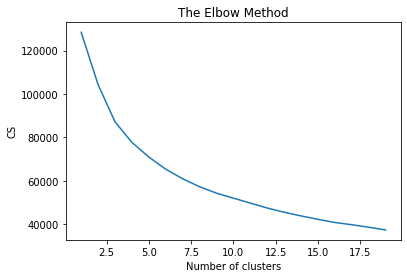

In [93]:
# Eyebow method to find the optimal number of clusters
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(XTest)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 20), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()